# Final Project for Supervised Machine Learning Classification

## Supervised Machine Learning Classification with Heart Attack Prediction

[Data Source](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

<br />
<hr />

    Mustafa Tayyip BAYRAM
     January 9, 2022
<hr />
<br />

## Objective
The heart is a remarkable organ. It keeps your body alive by continuously pumping oxygen and nutrient-rich blood throughout it. This fist-sized powerhouse pumps 23,000 liters (5,000 gallons) of blood per day, expanding and contracting 100,000 times every day. The heart, like any other muscle, requires adequate blood supply to function effectively.


The sudden obstruction of blood flow to a segment of the heart is classified as a heart attack (also known as myocardial infarction; MI). During a heart attack, some of the heart muscle begins to die, and without prompt medical care, the muscle loss could be permanent.

High blood pressure, high cholesterol, obesity, and diabetes can all increase the chance of having a heart attack. Unhealthy eating habits, lack of physical activity, smoking, and excessive alcohol intake can all contribute to heart attack-causing diseases. Some factors, such as age and a family history of heart disease, are unchangeable, although they are linked to an increased risk of heart attack.

## Data Set Contents
Age : Age of the patient
Sex : Sex of the patient (1= male, 0=female)
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack


Categorical Cols: cp, fbs, restecg, exng, slp, caa, thall, sex
Numerical Cols: Age, trestbps, chol, thalachh, oldpeak

## Notebook Contents
>1. Importing Packages
>2. Feature Engineering
>3. Exploratory Data Analysis
>4. Model Training
>> -logistic regression
>> -k-nearest neighbors
>> -support vector machine
>> -decision tree classifier
>> -random forest classifier
>> -extra trees classifier



## 1. Importing packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [5]:
# Suppressing warning messages
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Apply the default default seaborn theme, scaling, and color palette
sns.set()

In [7]:
df = pd.read_csv('heart.csv', sep=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Feature Engineering

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
duplicateRows = df[df.duplicated()]
duplicateRows
# Good to have just 1 duplicated row, let's drop it

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df = df.drop_duplicates()

In [12]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
df['output'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: output, dtype: float64

In [14]:
# Reset index for make it in order
df = df.reset_index(drop=True)

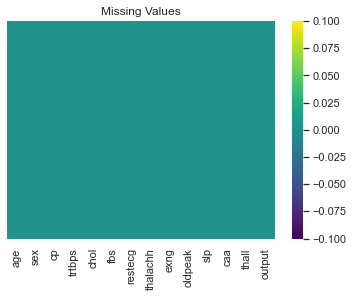

In [15]:
plt.figure()
plt.title('Missing Values')

ax = sns.heatmap(df.isnull(), yticklabels=False, cbar='viridis', cmap='viridis')

plt.show()
# Great, we have a smooth here.

Let's find outliers and plot histograms for numerical columns

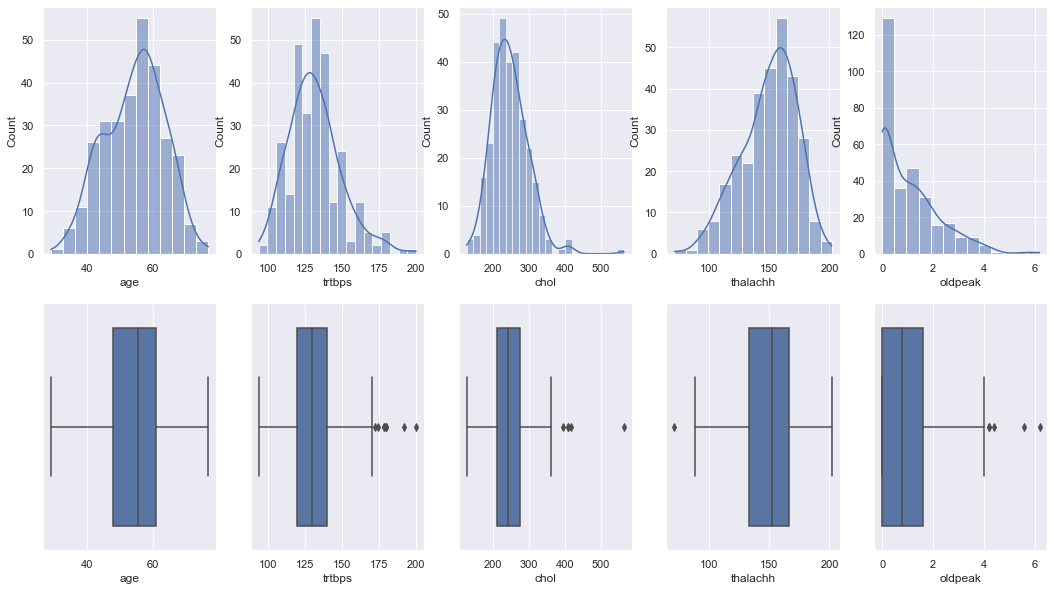

In [16]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(18,10))

# Plots histograms
for i, num_feature in enumerate(numerical_features):
    plt.subplot(2,5,i + 1)
    sns.histplot(df[num_feature], kde=True)

# Plotting boxplots
for i,num_feature in enumerate(numerical_features):
    plt.subplot(2,5,i + 6)
    sns.boxplot(df[num_feature])


##### Remove outliers and get better shapes.
There is no outlier in age col. However, other ones should be fixed.

In [17]:
# Clearing right sides.
for outlied_feature in ['trtbps', 'chol', 'oldpeak']:
    Q1 = df[outlied_feature].quantile(0.25)
    Q3 = df[outlied_feature].quantile(0.75)
    IQR = Q3 - Q1

    df.loc[df[outlied_feature] > Q3 + 1.5 * IQR, outlied_feature] = df.describe().loc['50%'][outlied_feature]

In [18]:
# Clearing left side
Q1 = df['thalachh'].quantile(0.25)
Q3 = df['thalachh'].quantile(0.75)
IQR = Q3 - Q1
min_thalachh = Q1 - 1.5 * IQR

median_thalachh = df.describe().loc['50%']['thalachh']
df.loc[df['thalachh'] < min_thalachh, 'thalachh'] = median_thalachh

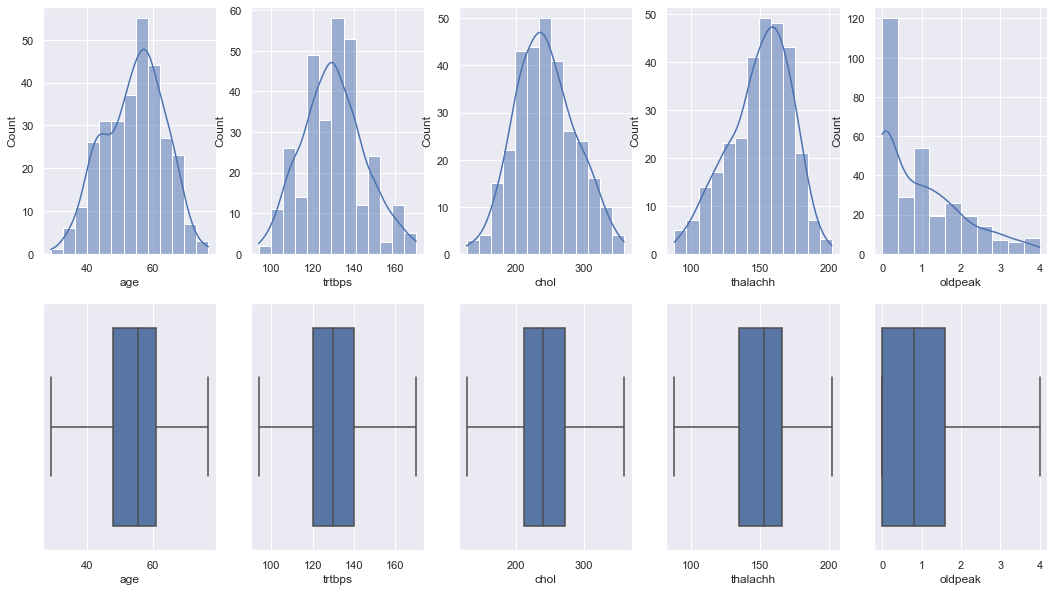

In [19]:
# Time to check
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(18,10))

# Plots histograms
for i, num_feature in enumerate(numerical_features):
    plt.subplot(2,5,i + 1)
    sns.histplot(df[num_feature], kde=True)

# Plotting boxplots
for i,num_feature in enumerate(numerical_features):
    plt.subplot(2,5,i + 6)
    sns.boxplot(df[num_feature])

In [20]:
for feature in df.columns:
    print(feature,":",df[feature].unique().size)

age : 41
sex : 2
cp : 4
trtbps : 43
chol : 148
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 36
slp : 3
caa : 5
thall : 4
output : 2


## 3. Exploratory Data Analysis


<AxesSubplot:xlabel='sex'>

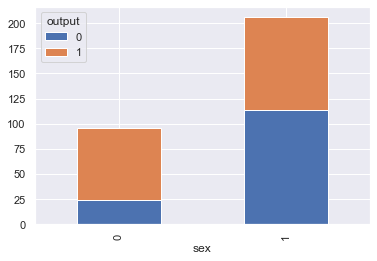

In [21]:
sex_plot = df.groupby(['sex', 'output']).size().reset_index().pivot(columns='output', index='sex', values=0)
sex_plot.plot(kind='bar', stacked=True)

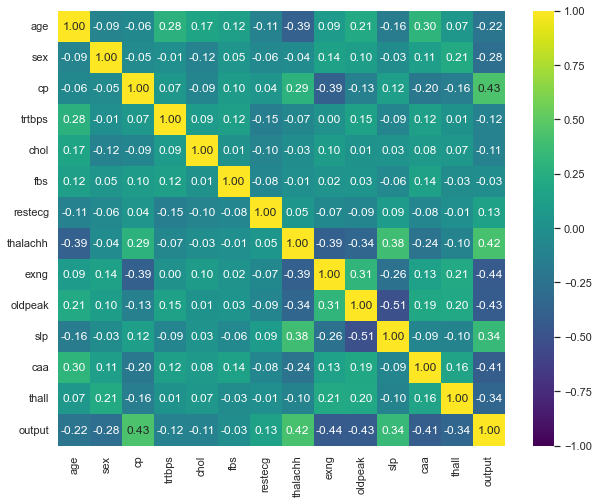

In [22]:
correlation = df.corr()
figure = plt.figure(figsize=(10,8))

cm = sns.heatmap(correlation, annot=True, fmt='.2f',
                 cmap='viridis', vmin=-1, vmax=+1)

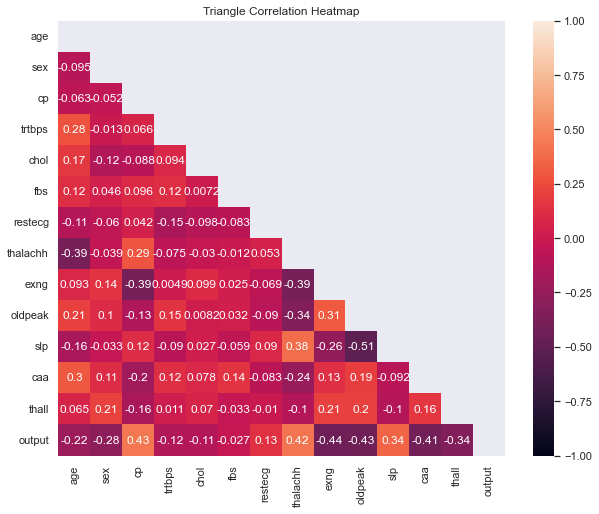

In [23]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
heatmap = sns.heatmap(correlation, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap');

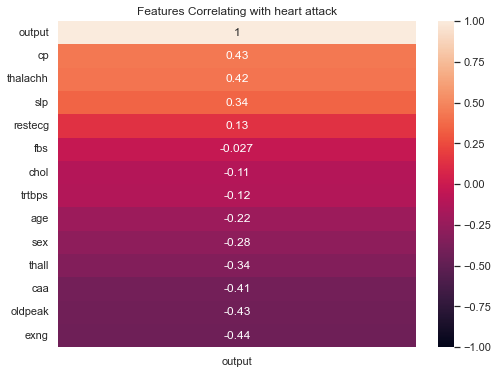

In [24]:
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation[['output']].sort_values(by='output', ascending=False), vmin=-1, vmax=+1, annot=True)
heatmap.set_title('Features Correlating with heart attack');

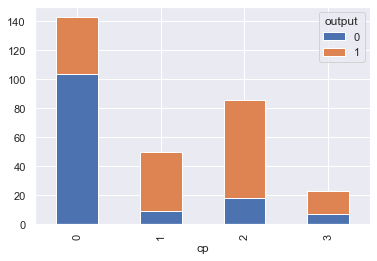

In [25]:
cp_plot = df.groupby(['output', 'cp']).size().reset_index().pivot(columns='output', index='cp', values=0)
cp_plot.plot(kind='bar', stacked=True);

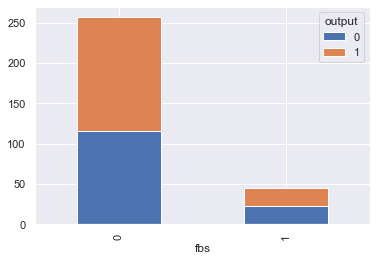

In [26]:
cp_plot = df.groupby(['output', 'fbs']).size().reset_index().pivot(columns='output', index='fbs', values=0)
cp_plot.plot(kind='bar', stacked=True);

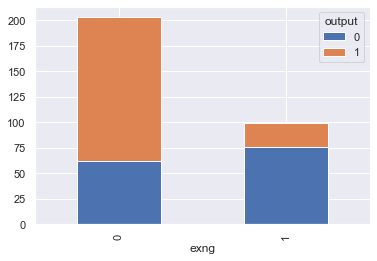

In [27]:
cp_plot = df.groupby(['output', 'exng']).size().reset_index().pivot(columns='output', index='exng', values=0)
cp_plot.plot(kind='bar', stacked=True);

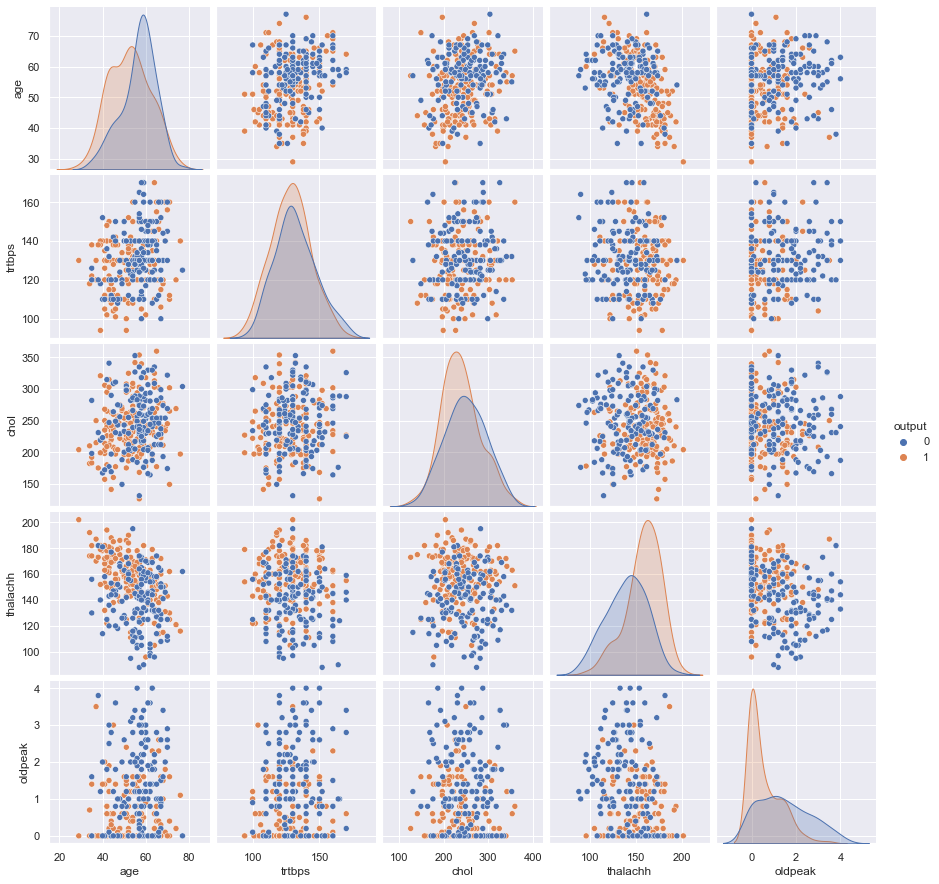

In [28]:
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']], hue='output')

<AxesSubplot:xlabel='age', ylabel='count'>

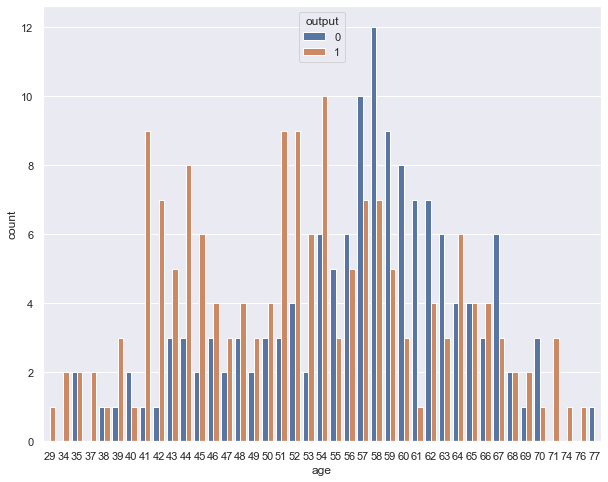

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x='age', data=df, hue='output')

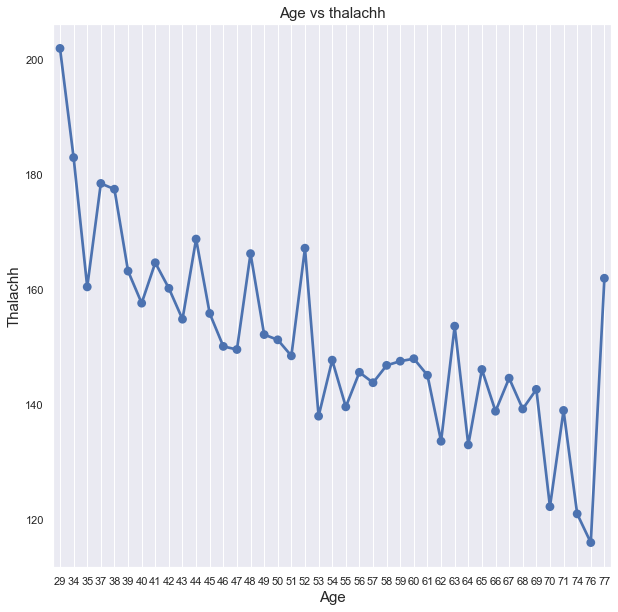

In [30]:
age_unique = sorted(df['age'].unique())
age_thalachh_values = df.groupby('age')['thalachh'].count().values
mean_thalachh = []
for i, age in enumerate(age_unique):
    mean_thalachh.append(sum(df[df['age'] == age]['thalachh']) / age_thalachh_values[i])

plt.figure(figsize=(10,10))
sns.pointplot(x=age_unique, y= mean_thalachh, alpha=0.8)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Thalachh', fontsize=15)
plt.title('Age vs thalachh', fontsize=15)
plt.grid()
plt.show()

Time to create ML models

## 4. Model Training


In [31]:
# Dummy variables should be used for categorical columns
categorical_features = ['cp', 'fbs', 'restecg', 'exng','slp', 'caa', 'thall', 'sex']
dummy_variables = dict()
dummy_variables['df'] = df
for cat_feature in categorical_features:
    dummy_variables[cat_feature + "_dummies"] = pd.get_dummies(df[cat_feature], prefix=cat_feature)
frames = list(dummy_variables.values())

df_new = pd.concat(frames, axis = 1)
df_new = df_new.drop(columns= categorical_features)
df_new.head()

,age,trtbps,chol,thalachh,oldpeak,output,cp_0,cp_1,cp_2,cp_3,...,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3,sex_0,sex_1
0,63,145,233.0,150.0,2.3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,37,130,250.0,187.0,3.5,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,41,130,204.0,172.0,1.4,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236.0,178.0,0.8,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,57,120,354.0,163.0,0.6,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
df_new.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'exng_0', 'exng_1', 'slp_0', 'slp_1', 'slp_2', 'caa_0',
       'caa_1', 'caa_2', 'caa_3', 'caa_4', 'thall_0', 'thall_1', 'thall_2',
       'thall_3', 'sex_0', 'sex_1'],
      dtype='object')

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new_scaled = scaler.fit_transform(df_new)
df_new_scaled = pd.DataFrame(data=df_new_scaled, columns=df_new.columns)
df = df_new_scaled
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,cp_0,cp_1,cp_2,cp_3,...,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3,sex_0,sex_1
0,0.708333,0.671053,0.457265,0.543860,0.575,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.166667,0.473684,0.529915,0.868421,0.875,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.250000,0.473684,0.333333,0.736842,0.350,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.562500,0.342105,0.470085,0.789474,0.200,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.342105,0.974359,0.657895,0.150,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV

y = df['output']
X = df.drop(columns= ['output'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

### Logistic Regression

In [35]:
# Import packages
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import average_precision_score

In [36]:
def CreateStats(y_test, y_pred, statsName):
    precision, recall = (round(float(x), 2) for x in list(score(y_test, y_pred,
                                                                      average='weighted'))[:-2])
    return pd.Series({'precision': precision,
                      'recall': recall,
                      'accuracy': round(accuracy_score(y_test, y_pred), 2),
                      'f1score': round(f1_score(y_test, y_pred), 2),
                      'auc': round(roc_auc_score(y_test, y_pred), 2)},
                     name=statsName)

In [37]:
metrics = pd.DataFrame()

# Standard Logistic Regression
LR = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)


lr_stats = CreateStats(y_test, y_pred_lr, 'Logistic Regression')

pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).iloc[:3, :2]

,0.0,1.0
precision,0.807692,0.800000
recall,0.750000,0.848485
f1-score,0.777778,0.823529


Let's create a method for seeing better.

In [38]:
def Plot(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

Text(0.5, 1.0, 'F1 Score = 0.823529411764706')

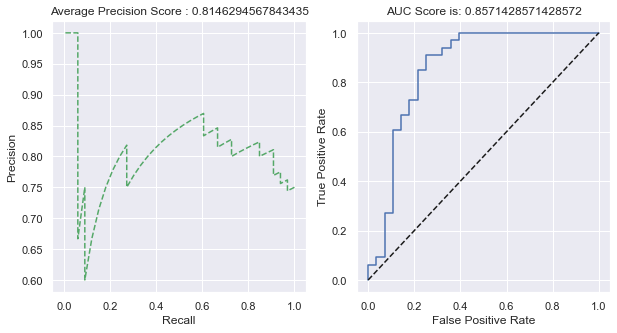

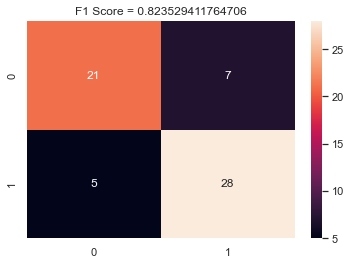

In [39]:
Plot(y_test, LR.predict_proba(X_test))

fig = plt.figure()
sns.heatmap(confusion_matrix(y_test, LR.predict(X_test)), annot=True)
LR_f1 = f1_score(y_test, LR.predict(X_test))
plt.title('F1 Score = {}'.format(LR_f1))

### K-Nearest Neighbors

In [40]:
# Estimate KNN model and report outcomes
KNN = KNeighborsClassifier(n_neighbors=3, weights='distance')
KNN = KNN.fit(X_train, y_train)
y_pred_knn = KNN.predict(X_test)

knn_stats = CreateStats(y_test, y_pred_knn, statsName='KNN')
# Display outcomes
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3, :2]

,0.0,1.0
precision,0.869565,0.789474
recall,0.714286,0.909091
f1-score,0.784314,0.845070


### Search from range of neighbors

In [41]:
test_score = []

neighbors = range(1, 30)
for n in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, KNN.predict(X_test)))

Maximum KNN score on the test data: 81.97%


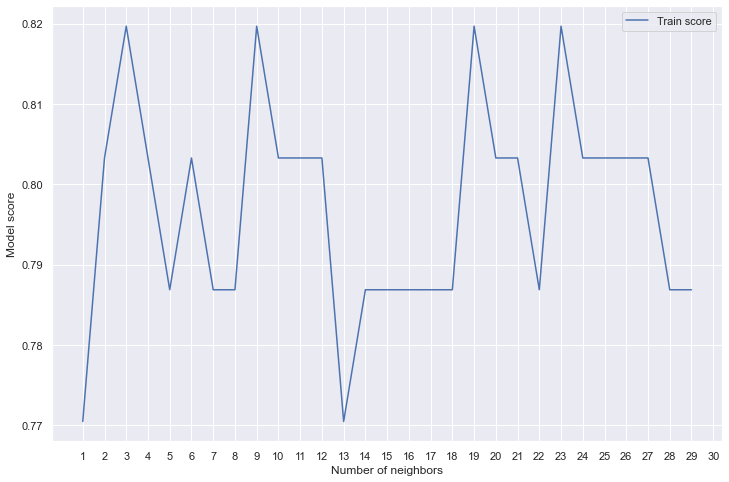

In [42]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, test_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [43]:
# Estimate KNN model and report outcomes
KNN = KNeighborsClassifier(n_neighbors=23, weights='distance')
KNN = KNN.fit(X_train, y_train)
y_pred_knn = KNN.predict(X_test)

knn_stats = CreateStats(y_test, y_pred_knn, statsName='KNN')
# Display outcomes
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3, :2]

,0.0,1.0
precision,0.875000,0.810811
recall,0.750000,0.909091
f1-score,0.807692,0.857143


We got better result when n_neighbors is 23

Text(0.5, 1.0, 'F1 Score = 0.8571428571428571')

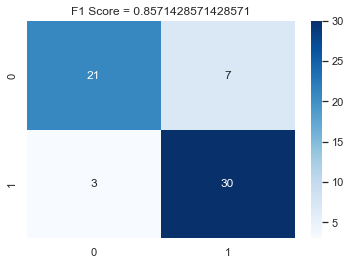

In [44]:
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot= True, cmap='Blues')
KNN_f1 = f1_score(y_test, y_pred_knn)
plt.title('F1 Score = {}'.format(KNN_f1))

### Suppport Vector Machine

In [59]:
from sklearn.svm import SVC

Find our parameters with GridSearchCV

In [61]:
SVM = SVC(C=2, gamma=0.1, kernel='rbf', probability=True)

params = {'C': (0.1, 0.5, 1, 2, 5, 10, 20),
          'gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
          'kernel': ('linear', 'poly', 'rbf'),
          }
SVM_cv = GridSearchCV(SVM, params, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
SVM_cv.fit(X_train, y_train)
best_params = SVM_cv.best_params_
best_params

Fitting 5 folds for each of 147 candidates, totalling 735 fits


{'C': 20, 'gamma': 0.25, 'kernel': 'rbf'}

We got our best paramters.

In [67]:
SVM = SVC(**best_params, probability=True)
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_test)
svm_stats = CreateStats(y_test, y_pred_svm, statsName='SVM')

Text(0.5, 1.0, 'F1 Score = 0.8059701492537314')

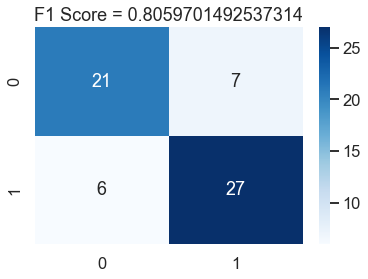

In [68]:
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot= True, cmap='Blues')
svm_f1=f1_score(y_test,y_pred_svm)
plt.title('F1 Score = {}'.format(svm_f1))

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
params = {"criterion":("gini", "entropy"),
          "splitter":("best", "random"),
          "max_depth":(list(range(1, 20))),
          "min_samples_split":[2, 3, 4],
          "min_samples_leaf":list(range(1, 20))
          }

DT = DecisionTreeClassifier(random_state=47)
DT_cv = GridSearchCV(DT, params, scoring='accuracy', n_jobs=-1, verbose=1, cv=3)
DT_cv.fit(X_train, y_train)
DT = DT.fit(X_train, y_train)
best_params = DT_cv.best_params_

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


In [71]:
DT = DecisionTreeClassifier(**best_params)
DT.fit(X_train, y_train)
print(DT.tree_.node_count, DT.tree_.max_depth)

65 6


In [72]:
y_train_pred = DT.predict(X_train)
y_pred_dt = DT.predict(X_test)

dt_stats = CreateStats(y_test, y_pred_dt, statsName='Decision Tree')
pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).iloc[:3, :2]

,0.0,1.0
precision,0.65625,0.758621
recall,0.75000,0.666667
f1-score,0.70000,0.709677


Text(0.5, 1.0, 'F1 Score = 0.7096774193548386')

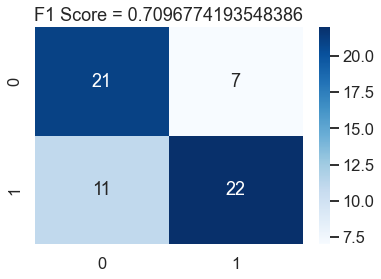

In [74]:
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot= True, cmap='Blues')
tree_f1=f1_score(y_test,y_pred_dt)
plt.title('F1 Score = {}'.format(tree_f1))

Scores are not well enough. Time to use more accurate technique
### Random Forest
We can find our n_estimators parameters without gridsearchcv

In [53]:
RF = RandomForestClassifier(oob_score=True, random_state=47, warm_start=True, n_jobs=1)

# list for out of bag error
oob_list = list()
n_trees = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
# Iterate through all of the possibilities for number of trees
for n in n_trees:
    # set the number of trees
    RF.set_params(n_estimators=n)

    RF.fit(X_train, y_train)

    # Get out of bag error and store it
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n': n, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n')
rf_oob_df

,oob
n,
15.0,0.240664
20.0,0.215768
30.0,0.199170
40.0,0.186722
50.0,0.186722
100.0,0.170124
150.0,0.170124
200.0,0.170124
300.0,0.165975


300 number has the lowest oob error.

[Text(0, 0.5, 'out-of-bag error')]

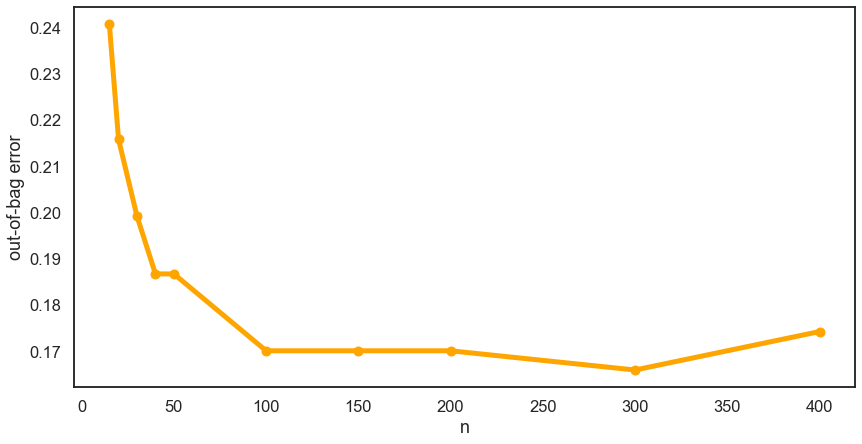

In [54]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', color='orange', figsize=(14,7), linewidth=5)
ax.set(ylabel='out-of-bag error')

The error appears to have settled around 100 trees.

In [78]:
RF = RF.set_params(n_estimators=100)
y_pred_rf = RF.predict(X_test)

rf_stats = CreateStats(y_test, y_pred_rf, statsName='Random Forest')

pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).iloc[:3, :2]

,0.0,1.0
precision,0.846154,0.828571
recall,0.785714,0.878788
f1-score,0.814815,0.852941


Text(0.5, 1.0, 'F1 Score = 0.8529411764705883')

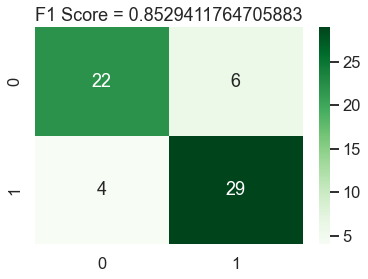

In [83]:
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot= True, cmap='Greens')

rf_f1=f1_score(y_test,y_pred_rf)
plt.title('F1 Score = {}'.format(rf_f1))

So we got better result than Decision Trees as expected

### Extra Trees Classifier

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

Text(0.5, 1.0, 'F1 Score = 0.823529411764706')

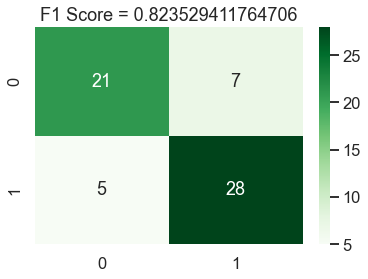

In [80]:
ETC = ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=47)

ETC.fit(X_train, y_train)
y_pred_etc = ETC.predict(X_test)
etc_stats = CreateStats(y_test, y_pred_etc, 'ETC')

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_etc), annot= True, cmap='Greens')

etc_f1=f1_score(y_test,y_pred_rf)
plt.title('F1 Score = {}'.format(etc_f1))

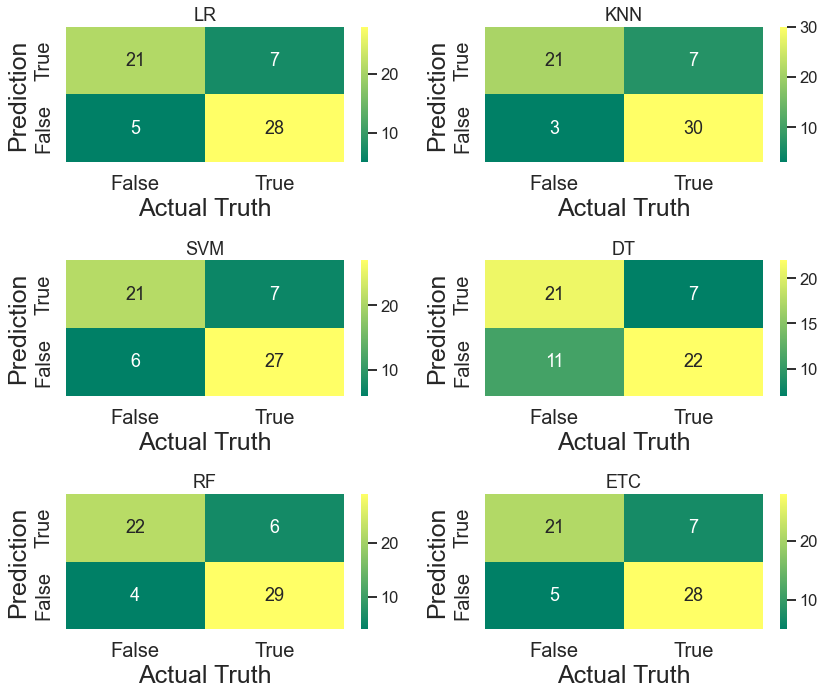

In [82]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

models = tecnique_labels = ['LR', 'KNN', 'SVM', 'DT', 'RF', 'ETC']
cm = [confusion_matrix(y_test, y_pred_lr),
      confusion_matrix(y_test, y_pred_knn),
      confusion_matrix(y_test, y_pred_svm),
      confusion_matrix(y_test, y_pred_dt),
      confusion_matrix(y_test, y_pred_rf),
      confusion_matrix(y_test, y_pred_etc),
      ]

labels = ['False', 'True']

for ax,model, idx in zip(axList, models, range(0,6)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt='d', cmap='summer')
    ax.set(title=model)
    ax.set_xticklabels(labels, fontsize=20)
    ax.set_yticklabels(labels[::-1], fontsize=20)
    ax.set_ylabel('Prediction', fontsize=25)
    ax.set_xlabel('Actual Truth', fontsize=25)

plt.tight_layout()

Each classifier's classification report demonstrates that I am able to predict consistent classification,with an F1 score of 0.857*** for KNN model, RF is it.
The error report below shows that there is a significant amount of misclassification.

In [88]:
metrics = metrics.append([lr_stats, knn_stats, svm_stats, dt_stats, rf_stats, etc_stats])
metrics

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.80,0.80,0.80,0.82,0.80
KNN,0.84,0.84,0.84,0.86,0.83
SVM,0.79,0.79,0.79,0.81,0.78
Decision Tree,0.71,0.70,0.70,0.71,0.71
Random Forest,0.84,0.84,0.84,0.85,0.83
ETC,0.80,0.80,0.80,0.82,0.80


Let's dig the graphs for better intuition

Feature importance is not defined for the KNN Classification algorithm. There is no easy way to compute the features responsible for a classification here. RF will be enough to get info from this point.

Text(0.5, 1.0, 'Feature Importance')

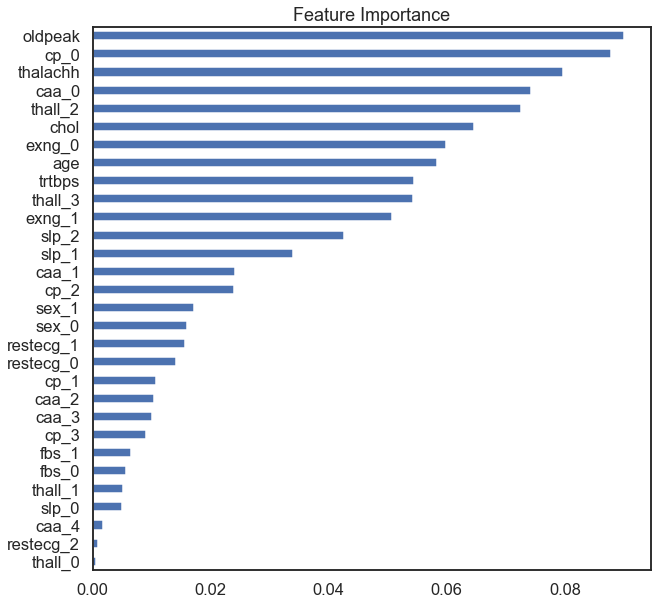

In [87]:
## Feature Importance

fig= plt.figure(figsize=(10,10))
important=pd.Series(RF.feature_importances_, index= X_train.columns)
important.sort_values().plot.barh()
plt.title('Feature Importance')

Text(0.5, 1.0, 'Model Accuracy')

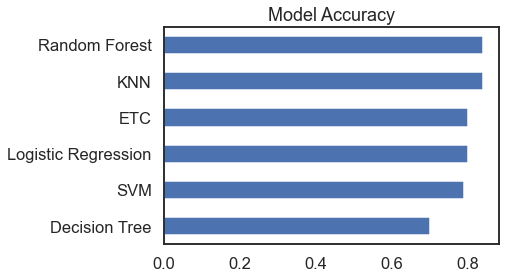

In [93]:
fig = plt.figure()
metrics['accuracy'].sort_values().plot.barh()
plt.title('Model Accuracy')

Text(0.5, 1.0, 'Model F1 Score')

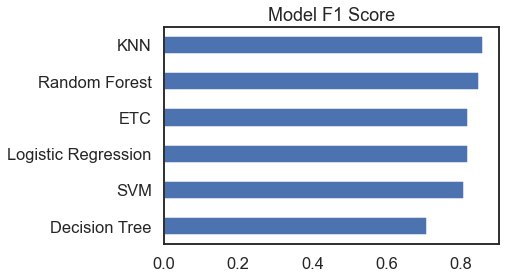

In [95]:
fig = plt.figure()
metrics['f1score'].sort_values().plot.barh()
plt.title('Model F1 Score')

# As a result
The UCI heart attack dataset was used to find the best machine learning algorithm for predicting a possible myocardial infarction (classification task)

Some numerical variables were explored by creating their corresponding plots after some feature engineering of the acquired dataset and the removal of both duplicate and outlier values.

A correlation heatmap was then created to determine which variables are correlated, to what extent, and in which direction, as well as to identify any multicollinearity issues.

Before creating the ML models, the dataset was preprocessed by creating dummy variables and scaling the numerical features. A logistic regression, a k-nearest neighbors, a support vector machine, a decision tree classifier, a random forest classifier, an extra trees classifier were among the 6 models created. Some of them were investigated further using grid-search to tune their hyperparameters and some of them by hand.

The classification reports for each classifier show that I can predict consistent classification, with an F1 score of 0.857*** for the KNN model was selected as the most suitable.

### Next Steps
Creating gradient boosting classifier, and a bagging classifier model.